In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Make plots a bit bigger by default
plt.rcParams["figure.figsize"] = (12, 4)


In [2]:
ee = pd.read_csv("../data/raw/EE_pm25_2018_2024.csv")
lv = pd.read_csv("../data/raw/LV_pm25_2018_2024.csv")
lt = pd.read_csv("../data/raw/LT_pm25_2018_2024.csv")

ee.shape, lv.shape, lt.shape


((3367, 10), (4049, 10), (9473, 10))

In [3]:
ee.head()


,sensor_id,parameter,units,date_local,avg_value,country_code,locality,location_name,latitude,longitude
0,23435,pm25,µg/m³,2020-04-20,0.502,EE,Saare,"""Saarejärve""",58.702778,26.758898
1,23435,pm25,µg/m³,2020-04-21,0.976,EE,Saare,"""Saarejärve""",58.702778,26.758898
2,23435,pm25,µg/m³,2020-04-22,1.430,EE,Saare,"""Saarejärve""",58.702778,26.758898
3,23435,pm25,µg/m³,2020-04-23,3.490,EE,Saare,"""Saarejärve""",58.702778,26.758898
4,23435,pm25,µg/m³,2020-04-24,2.710,EE,Saare,"""Saarejärve""",58.702778,26.758898


In [4]:
baltics = pd.concat([ee, lv, lt], ignore_index=True)
baltics.shape


(16889, 10)

In [5]:
baltics["country_code"].value_counts()
baltics["parameter"].value_counts()
baltics[["date_local", "avg_value"]].head()


,date_local,avg_value
0,2020-04-20,0.502
1,2020-04-21,0.976
2,2020-04-22,1.430
3,2020-04-23,3.490
4,2020-04-24,2.710


In [7]:
baltics["date_local"] = pd.to_datetime(baltics["date_local"], errors="coerce")


In [8]:
baltics["date_local"].head()


0   2020-04-20
1   2020-04-21
2   2020-04-22
3   2020-04-23
4   2020-04-24
Name: date_local, dtype: datetime64[ns]

In [9]:
baltics["avg_value"] = pd.to_numeric(baltics["avg_value"], errors="coerce")


In [10]:
baltics_clean = baltics.dropna(subset=["date_local", "avg_value"])
baltics_clean.shape


(16889, 10)

In [11]:
baltics_clean["avg_value"].describe()


count    16889.000000
mean         8.186816
std         65.862367
min        -17.700000
25%          3.280000
50%          6.000000
75%          9.970000
max       8460.000000
Name: avg_value, dtype: float64

In [12]:
lv_daily = (
    baltics_clean[baltics_clean["country_code"] == "LV"]
    .groupby("date_local")["avg_value"]
    .mean()
    .reset_index()
)

lv_daily.head()


,date_local,avg_value
0,2022-02-10,6.566667
1,2022-02-13,13.633333
2,2022-02-14,15.633333
3,2022-02-15,23.400000
4,2022-02-16,16.726667


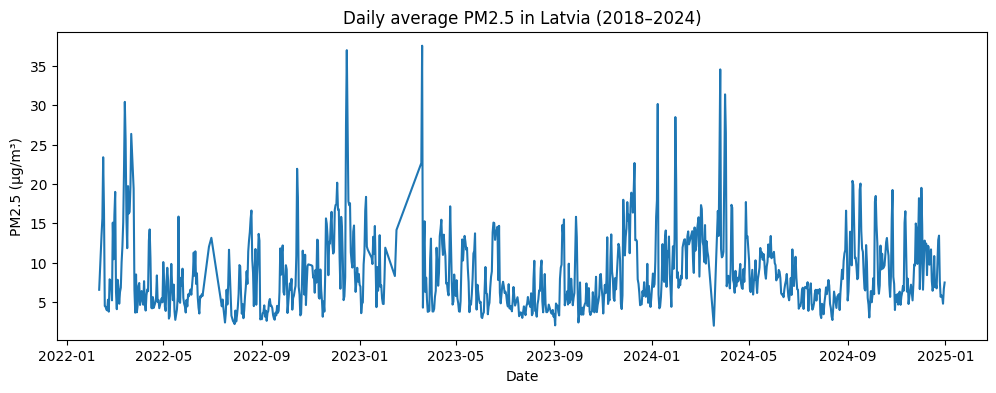

In [13]:
plt.plot(lv_daily["date_local"], lv_daily["avg_value"])
plt.title("Daily average PM2.5 in Latvia (2018–2024)")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()


In [14]:
baltics_daily = (
    baltics_clean
    .groupby(["country_code", "date_local"])["avg_value"]
    .mean()
    .reset_index()
)

baltics_daily.head()


,country_code,date_local,avg_value
0,EE,2020-04-20,1.89575
1,EE,2020-04-21,3.31150
2,EE,2020-04-22,3.26750
3,EE,2020-04-23,4.92500
4,EE,2020-04-24,4.56250


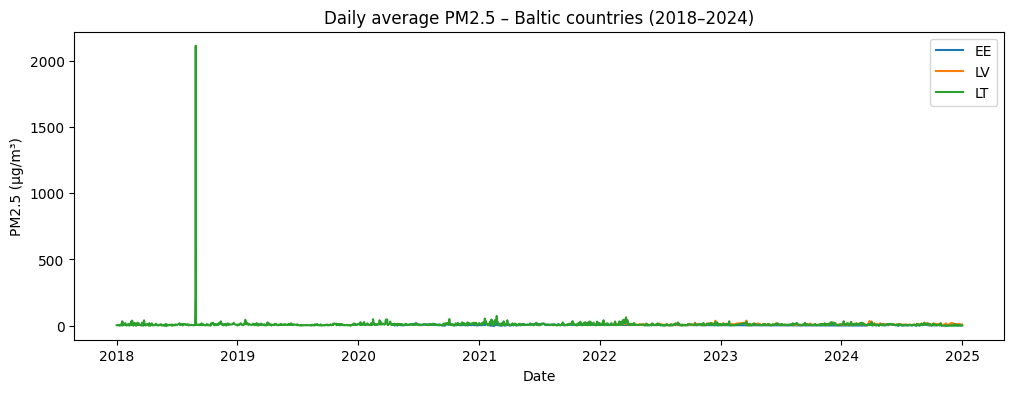

In [15]:
for code in ["EE", "LV", "LT"]:
    subset = baltics_daily[baltics_daily["country_code"] == code]
    plt.plot(subset["date_local"], subset["avg_value"], label=code)

plt.title("Daily average PM2.5 – Baltic countries (2018–2024)")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()


In [16]:
# Look for extremely high values
baltics_clean[baltics_clean["avg_value"] > 500].sort_values("avg_value", ascending=False).head(10)


,sensor_id,parameter,units,date_local,avg_value,country_code,locality,location_name,latitude,longitude
12862,23735,pm25,µg/m³,2018-08-28,8460.0,LT,Ringaud seninija,"""Kaunas - Noreikiskes""",54.883614,23.835835
12861,23735,pm25,µg/m³,2018-08-27,967.0,LT,Ringaud seninija,"""Kaunas - Noreikiskes""",54.883614,23.835835


In [17]:
baltics_no_outliers = baltics_clean[baltics_clean["avg_value"] <= 500]


In [18]:
baltics_no_outliers.shape


(16887, 10)

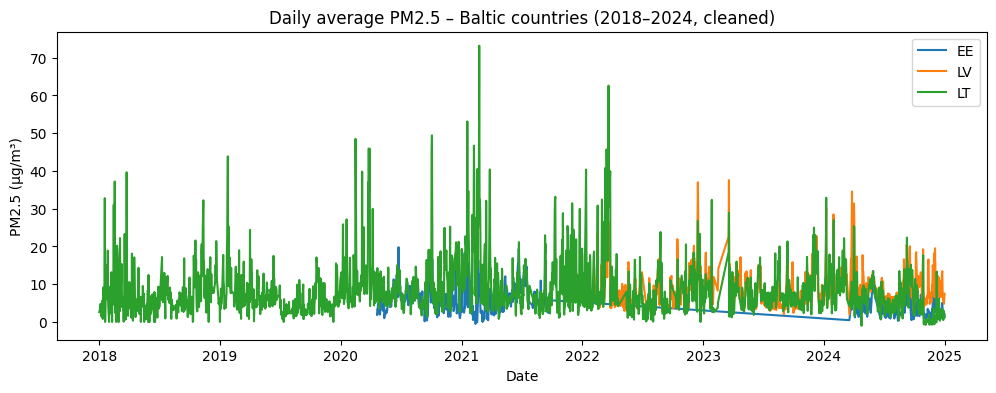

In [19]:
baltics_daily_no_outliers = (
    baltics_no_outliers
    .groupby(["country_code", "date_local"])["avg_value"]
    .mean()
    .reset_index()
)

for code in ["EE", "LV", "LT"]:
    subset = baltics_daily_no_outliers[baltics_daily_no_outliers["country_code"] == code]
    plt.plot(subset["date_local"], subset["avg_value"], label=code)

plt.title("Daily average PM2.5 – Baltic countries (2018–2024, cleaned)")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()


In [20]:
baltics_clean["year"] = baltics_clean["date_local"].dt.year
baltics_clean["month"] = baltics_clean["date_local"].dt.month


In [21]:
baltics_monthly = (
    baltics_clean
    .groupby(["country_code", "year", "month"])["avg_value"]
    .mean()
    .reset_index()
)

baltics_monthly.head()


,country_code,year,month,avg_value
0,EE,2020,4,3.273409
1,EE,2020,5,4.417042
2,EE,2020,6,9.234444
3,EE,2020,7,6.773350
4,EE,2020,8,7.612691


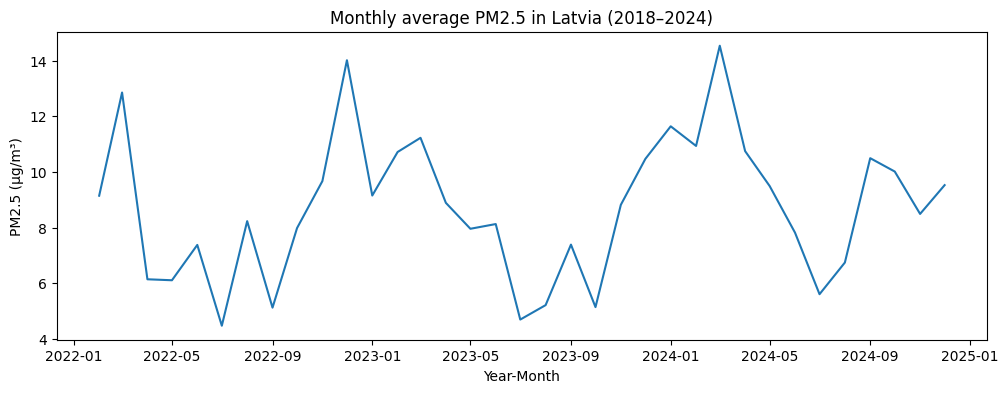

In [22]:
lv_monthly = baltics_monthly[baltics_monthly["country_code"] == "LV"]

plt.plot(
    pd.to_datetime(lv_monthly["year"].astype(str) + "-" + lv_monthly["month"].astype(str) + "-01"),
    lv_monthly["avg_value"],
)
plt.title("Monthly average PM2.5 in Latvia (2018–2024)")
plt.xlabel("Year-Month")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()


In [23]:
WHO_DAILY_LIMIT = 15.0  # µg/m³

# Use the cleaned, no-outlier dataset
baltics_no_outliers["date_local"] = pd.to_datetime(baltics_no_outliers["date_local"], errors="coerce")

baltics_daily = (
    baltics_no_outliers
    .groupby(["country_code", "date_local"])["avg_value"]
    .mean()
    .reset_index()
)

baltics_daily.head()


C:\Users\Rakesh\AppData\Local\Temp\ipykernel_10076\3451946838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baltics_no_outliers["date_local"] = pd.to_datetime(baltics_no_outliers["date_local"], errors="coerce")


,country_code,date_local,avg_value
0,EE,2020-04-20,1.89575
1,EE,2020-04-21,3.31150
2,EE,2020-04-22,3.26750
3,EE,2020-04-23,4.92500
4,EE,2020-04-24,4.56250


In [24]:
baltics_daily["above_WHO"] = baltics_daily["avg_value"] > WHO_DAILY_LIMIT


In [25]:
who_exceed_country = (
    baltics_daily
    .groupby("country_code")["above_WHO"]
    .mean() * 100  # convert fraction to %
).reset_index()

who_exceed_country.rename(columns={"above_WHO": "pct_days_above_WHO_15ugm3"}, inplace=True)
who_exceed_country


,country_code,pct_days_above_WHO_15ugm3
0,EE,1.608579
1,LT,11.528150
2,LV,9.299896


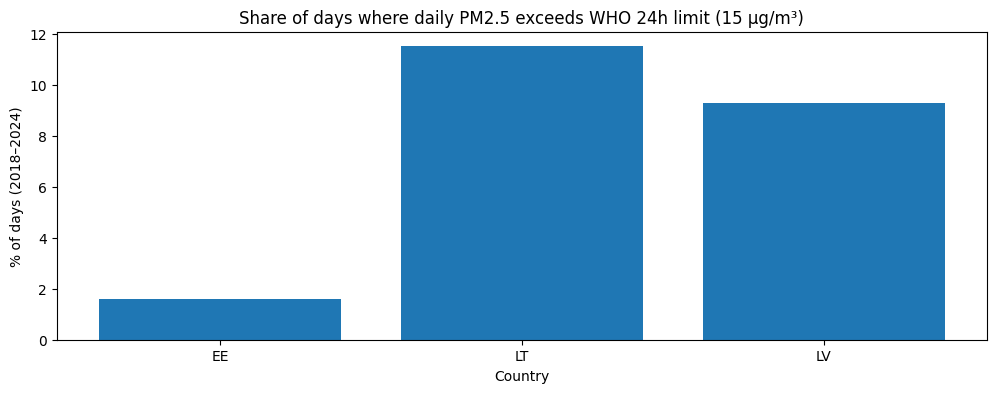

In [26]:
plt.bar(who_exceed_country["country_code"], who_exceed_country["pct_days_above_WHO_15ugm3"])
plt.title("Share of days where daily PM2.5 exceeds WHO 24h limit (15 µg/m³)")
plt.xlabel("Country")
plt.ylabel("% of days (2018–2024)")
plt.show()


In [27]:
baltics_daily["year"] = baltics_daily["date_local"].dt.year

who_exceed_country_year = (
    baltics_daily
    .groupby(["country_code", "year"])["above_WHO"]
    .mean() * 100
).reset_index()

who_exceed_country_year.head()


,country_code,year,above_WHO
0,EE,2020,0.819672
1,EE,2021,4.115226
2,EE,2024,0.000000
3,LT,2018,9.876543
4,LT,2019,5.000000


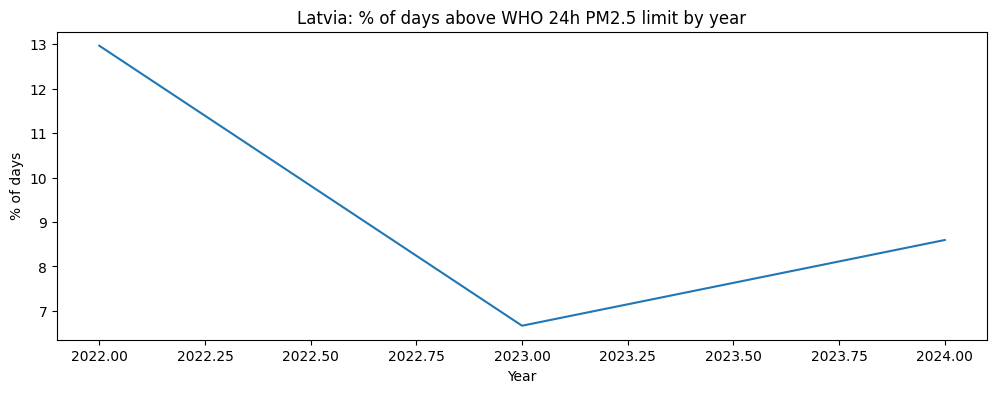

In [28]:
lv_who = who_exceed_country_year[who_exceed_country_year["country_code"] == "LV"]

plt.plot(lv_who["year"], lv_who["above_WHO"])
plt.title("Latvia: % of days above WHO 24h PM2.5 limit by year")
plt.xlabel("Year")
plt.ylabel("% of days")
plt.show()


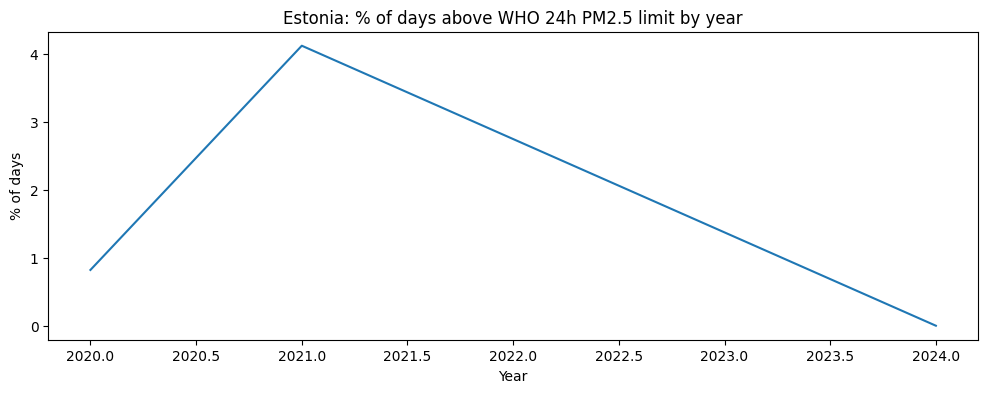

In [30]:
ee_who = who_exceed_country_year[who_exceed_country_year["country_code"] == "EE"]

plt.plot(ee_who["year"], ee_who["above_WHO"])
plt.title("Estonia: % of days above WHO 24h PM2.5 limit by year")
plt.xlabel("Year")
plt.ylabel("% of days")
plt.show()

In [32]:
baltics_no_outliers = baltics_no_outliers.copy()

baltics_no_outliers["month"] = baltics_no_outliers["date_local"].dt.month

def month_to_season(m):
    if m in [12, 1, 2]:
        return "Winter"
    elif m in [3, 4, 5]:
        return "Spring"
    elif m in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

baltics_no_outliers["season"] = baltics_no_outliers["month"].apply(month_to_season)



In [33]:
seasonal_country = (
    baltics_no_outliers
    .groupby(["country_code", "season"])["avg_value"]
    .mean()
    .reset_index()
)

seasonal_country


,country_code,season,avg_value
0,EE,Autumn,4.654585
1,EE,Spring,4.393278
2,EE,Summer,6.351597
3,EE,Winter,4.020969
4,LT,Autumn,7.432571
5,LT,Spring,8.527281
6,LT,Summer,6.056069
7,LT,Winter,10.498698
8,LV,Autumn,8.602391
9,LV,Spring,9.907415


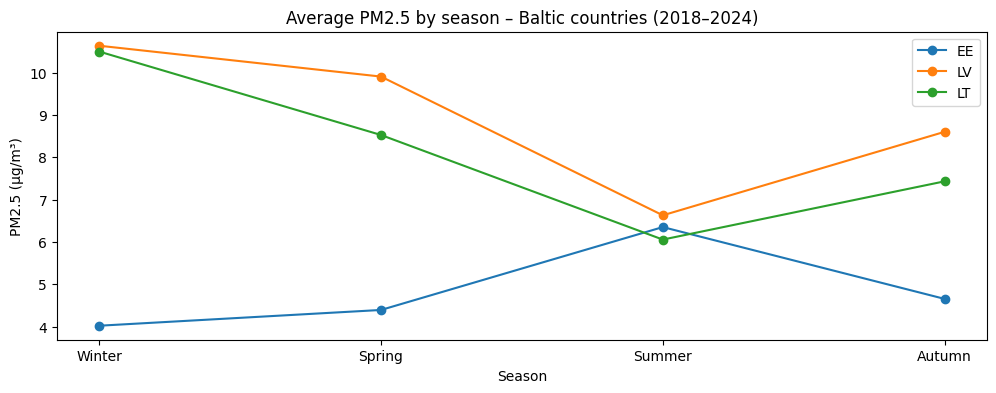

In [34]:
seasons_order = ["Winter", "Spring", "Summer", "Autumn"]
codes = ["EE", "LV", "LT"]

for code in codes:
    sub = seasonal_country[seasonal_country["country_code"] == code]
    sub = sub.set_index("season").reindex(seasons_order).reset_index()
    
    plt.plot(sub["season"], sub["avg_value"], marker="o", label=code)

plt.title("Average PM2.5 by season – Baltic countries (2018–2024)")
plt.xlabel("Season")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()


In [35]:
import folium


In [36]:
baltics_2023 = baltics_no_outliers[
    baltics_no_outliers["date_local"].dt.year == 2023
]

station_means_2023 = (
    baltics_2023
    .groupby(["country_code", "location_name", "latitude", "longitude"])["avg_value"]
    .mean()
    .reset_index()
)

station_means_2023.head()


,country_code,location_name,latitude,longitude,avg_value
0,LT,"""Aukstaitija""",55.463333,26.004169,4.463689
1,LT,"""Kaunas - Noreikiskes""",54.883614,23.835835,8.823286
2,LT,"""Kaunas - Petrasiunai""",54.895128,23.986222,10.130763
3,LT,"""Klaipeda - Silutes""",55.690000,21.179460,7.284701
4,LT,"""N.Akmene""",56.319440,22.870840,8.376321


In [37]:
def pm25_color(v):
    if v <= 5:
        return "green"      # meets WHO annual guideline
    elif v <= 15:
        return "orange"     # between annual & daily guideline
    else:
        return "red"        # above WHO daily guideline


In [38]:
# Rough center of the Baltics
m = folium.Map(location=[56.8, 24.0], zoom_start=5)

for _, row in station_means_2023.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        popup=f'{row["location_name"]} ({row["country_code"]}) – {row["avg_value"]:.1f} µg/m³',
        color=pm25_color(row["avg_value"]),
        fill=True,
        fill_opacity=0.7,
    ).add_to(m)

# Save to HTML
map_path = "../data/raw/baltics_pm25_2023_map.html"
m.save(map_path)
map_path


'../data/raw/baltics_pm25_2023_map.html'

In [39]:
import statsmodels.api as sm

# See top Baltic cities (just to check the exact names)
baltics_no_outliers["locality"].value_counts().head(20)


locality
Petra in seninija                   2099
Ringaud seninija                    2081
UNK                                 2051
Tauragn seninija                    1982
Riga                                 957
Ventspils                            954
Rucava                               945
Nõo                                  742
Tallinn                              714
Kohtla-Järve                         701
Saare                                694
Rezekne                              598
Liepaja                              595
Naujosios Akmens miesto seninija     559
irmn seninija                        533
Narva                                258
Vihula                               258
Name: count, dtype: int64

In [40]:
city_name = "Riga"

city_daily = (
    baltics_no_outliers[baltics_no_outliers["locality"] == city_name]
    .groupby("date_local")["avg_value"]
    .mean()
    .sort_index()
)

# Resample to monthly mean (start of month)
city_monthly = city_daily.resample("MS").mean().dropna()
city_monthly.head()


date_local
2022-02-01    10.419412
2022-03-01    13.593448
2022-04-01     7.033000
2022-05-01     6.833871
2022-06-01     8.424286
Freq: MS, Name: avg_value, dtype: float64

In [41]:
# ARIMA(p, d, q) – we'll use a simple (1,1,1)
model = sm.tsa.ARIMA(city_monthly, order=(1, 1, 1))
results = model.fit()

# Forecast next 12 months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

forecast_index = pd.date_range(
    start=city_monthly.index[-1] + pd.offsets.MonthBegin(1),
    periods=forecast_steps,
    freq="MS"
)
forecast_mean.index = forecast_index


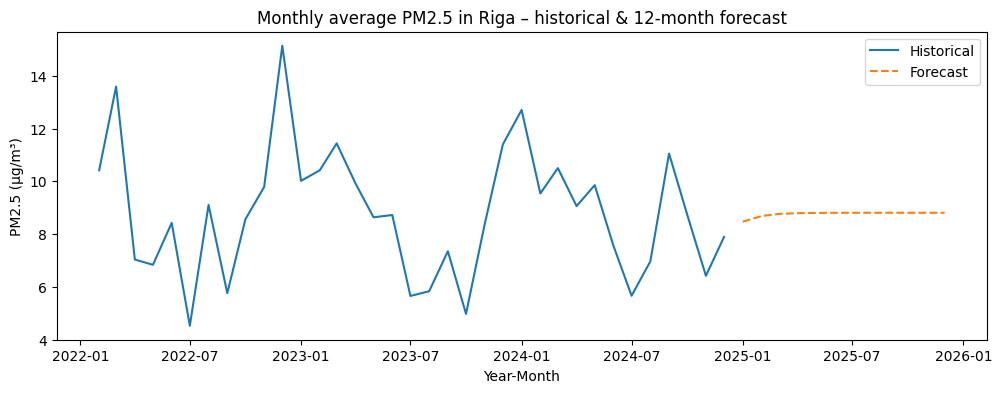

In [42]:
plt.plot(city_monthly.index, city_monthly, label="Historical")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", linestyle="--")
plt.title(f"Monthly average PM2.5 in {city_name} – historical & 12-month forecast")
plt.xlabel("Year-Month")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()


In [43]:
import statsmodels.api as sm


In [44]:
model = sm.tsa.statespace.SARIMAX(
    city_monthly,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),  # 12 = yearly seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()


C:\Users\Rakesh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [45]:
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_index = pd.date_range(
    start=city_monthly.index[-1] + pd.offsets.MonthBegin(1),
    periods=forecast_steps,
    freq="MS"
)
forecast_mean.index = forecast_index


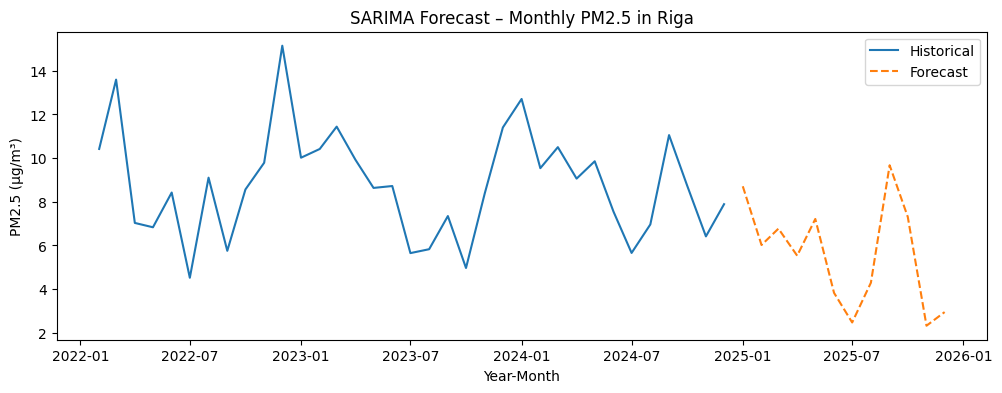

In [46]:
plt.plot(city_monthly.index, city_monthly, label="Historical")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", linestyle="--")
plt.title(f"SARIMA Forecast – Monthly PM2.5 in {city_name}")
plt.xlabel("Year-Month")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()


In [47]:
import os

# Make sure processed folder exists
os.makedirs("../data/processed", exist_ok=True)

# Example: save the cleaned, no-outlier daily data
baltics_no_outliers.to_csv("../data/processed/baltics_no_outliers.csv", index=False)

# Optional: daily aggregated version
baltics_daily_no_outliers.to_csv("../data/processed/baltics_daily_no_outliers.csv", index=False)


In [48]:
import os

for root, dirs, files in os.walk("..", topdown=True):
    if "air-quality-baltics" in root:
        print(root.replace("\\", "/"))
        for f in files:
            print("   -", f)
